# Pitch Type 3D Plot

Data visualization is one such area where a large number of libraries have been developed in Python. Among these, Matplotlib is the most popular choice for data visualization. While initially developed for plotting 2-D charts like histograms, bar charts, scatter plots, line plots, etc., Matplotlib has extended its capabilities to offer 3D plotting modules as well. We explore these by plotting pitch types in 3 dimension to help pull the data apart to show clear clusters of data.

To get the most out of our data we use pitch type as a coloring mechanism, in addition to release speed, movement in x direction, and movement in z direction.

The data used is pulled from pybaseball, which is explained in the "Learn Python with Baseball" course. Specifically, we use statcast pitch by pitch data to plot individual pitches and their characteristics one by one.

In [1]:
# General Packages
import numpy as np
import pandas as pd
import pybaseball as pyb
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [2]:
pitches = pyb.statcast('2021-06-01', '2021-07-01')

pitches = pitches[pitches['pitch_name']!='Split-Finger']
pitches = pitches[pitches['pitch_name']!='Knuckle Curve']
pitches = pitches[pitches['p_throws']=='R']
pitches = pitches[:500]

This is a large query, it may take a moment to complete


100%|███████████████████████████████████████████████████████████████████████████| 31/31 [00:40<00:00,  1.32s/it]


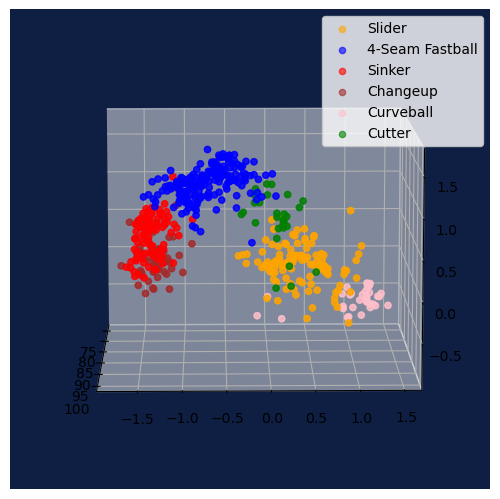

In [3]:
fig = plt.figure()
ax = Axes3D(fig)

def init():
    
    slider = ax.scatter(pitches[pitches['pitch_name']=='Slider']['release_speed'], pitches[pitches['pitch_name']=='Slider']['pfx_x'], pitches[pitches['pitch_name']=='Slider']['pfx_z'], marker='o', s=20, color='orange', alpha=0.6,label='Slider')
    fastball = ax.scatter(pitches[pitches['pitch_name']=='4-Seam Fastball']['release_speed'], pitches[pitches['pitch_name']=='4-Seam Fastball']['pfx_x'], pitches[pitches['pitch_name']=='4-Seam Fastball']['pfx_z'], marker='o', s=20, color='blue', alpha=0.6,label='4-Seam Fastball')
    sinker = ax.scatter(pitches[pitches['pitch_name']=='Sinker']['release_speed'], pitches[pitches['pitch_name']=='Sinker']['pfx_x'], pitches[pitches['pitch_name']=='Sinker']['pfx_z'], marker='o', s=20, color='red', alpha=0.6,label='Sinker')
    change = ax.scatter(pitches[pitches['pitch_name']=='Changeup']['release_speed'], pitches[pitches['pitch_name']=='Changeup']['pfx_x'], pitches[pitches['pitch_name']=='Changeup']['pfx_z'], marker='o', s=20, color='brown', alpha=0.6,label='Changeup')
    curve = ax.scatter(pitches[pitches['pitch_name']=='Curveball']['release_speed'], pitches[pitches['pitch_name']=='Curveball']['pfx_x'], pitches[pitches['pitch_name']=='Curveball']['pfx_z'], marker='o', s=20, color='pink', alpha=0.6,label='Curveball')
    cut = ax.scatter(pitches[pitches['pitch_name']=='Cutter']['release_speed'], pitches[pitches['pitch_name']=='Cutter']['pfx_x'], pitches[pitches['pitch_name']=='Cutter']['pfx_z'], marker='o', s=20, color='green', alpha=0.6,label='Cutter')
    
    ax.legend(handles=[slider,fastball, sinker, change, curve, cut],loc=1)
    ax.set_facecolor(color = '#0f1f44')
    
    #ax.set_xlabel('Speed (MPH)')
    #ax.set_ylabel('Horizontal Mov')
    #ax.set_zlabel('Vertical Mov')
    
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('speed_x_mov_z_mov.mp4', fps=30, extra_args=['-vcodec', 'libx264'])